# Linear regression

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn import linear_model

In [2]:
df = pd.read_csv(r"homeprices(lin_reg).csv")
df

,area,price
0,2600,550000
1,3000,565000
2,3200,610000
3,3600,680000
4,4000,725000


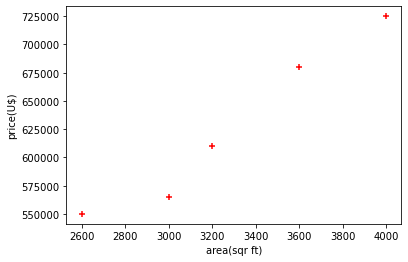

In [3]:
%matplotlib inline
plt.xlabel("area(sqr ft)")
plt.ylabel("price(U$)")
plt.scatter(df.area, df.price, color="red", marker = "+")

In [4]:
reg = linear_model.LinearRegression()

In [5]:
reg.fit(df[["area"]],df.price)

LinearRegression()

In [6]:
reg.predict([[3300]])

C:\Users\kaine\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([628715.75342466])

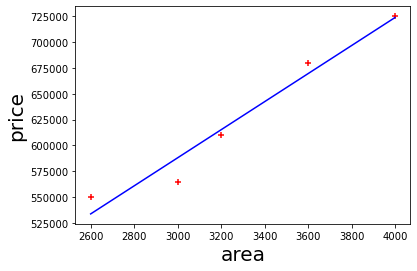

In [7]:
%matplotlib inline
plt.xlabel("area", fontsize = 20)
plt.ylabel("price", fontsize = 20)
plt.scatter(df.area, df.price, color="red", marker = "+")
plt.plot(df.area, reg.predict(df[['area']]), color = "blue") 

In [8]:
d = pd.read_csv("areas.csv")
d

,area
0,1000
1,1500
2,2300
3,3540
4,4120
5,4560
6,5490
7,3460
8,4750
9,2300


- Making predictions using a dataset with areas only

In [9]:
p = reg.predict(d)

- Saving the predicitions in a column named "prices"

In [10]:
d["prices"] = p

In [11]:
d.to_csv("predictions.csv", index = False)

# Saving a model to a file with pickle package

In [12]:
import pickle

In [13]:
with open('model_pickle','wb') as f:
    pickle.dump(reg, f)

In [14]:
with open('model_pickle', 'rb') as f:
    mp = pickle.load(f)

In [15]:
mp.predict([[5000]])

C:\Users\kaine\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([859554.79452055])

# Saving a model to a file with joblib
- Is best for models which use many numpy arrays

In [16]:
import joblib

In [17]:
joblib.dump(reg,"model_joblib")

['model_joblib']

In [18]:
mj = joblib.load('model_joblib')

In [19]:
mj.predict([[5000]])

C:\Users\kaine\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([859554.79452055])

# Different approach to linear regression

In [20]:
import seaborn as sns

In [21]:
companies = pd.read_csv('1000_Companies.csv')
Y = companies.Profit
X = companies.drop(['Profit'], axis = 1)

<AxesSubplot:>

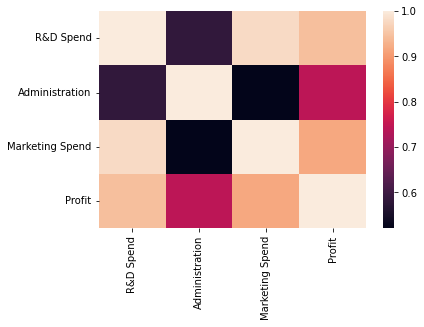

In [22]:
 sns.heatmap(companies.corr())

In [43]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
from sklearn.preprocessing import LabelEncoder

In [44]:
le = LabelEncoder()
X['State'] = le.fit_transform(X['State'])

In [45]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.2)

In [46]:
X_train.shape, Y_train.shape

((800, 4), (800,))

In [47]:
model = linear_model.LinearRegression()

In [48]:
X

,R&D Spend,Administration,Marketing Spend,State
0,165349.20,136897.800,471784.1000,2
1,162597.70,151377.590,443898.5300,0
2,153441.51,101145.550,407934.5400,1
3,144372.41,118671.850,383199.6200,2
4,142107.34,91391.770,366168.4200,1
...,...,...,...,...
995,54135.00,118451.999,173232.6695,0
996,134970.00,130390.080,329204.0228,0
997,100275.47,241926.310,227142.8200,0
998,128456.23,321652.140,281692.3200,0


In [49]:
model.fit(X_train, Y_train)

LinearRegression()

In [50]:
Y_pred = model.predict(X_test)

In [53]:
l2 = mean_absolute_error(Y_test, Y_pred)
print('MAE of Linear Regression on test set: {:.3f}'.format(l2))
print('Mean squared error (MSE): %.2f'
      % mean_squared_error(Y_test, Y_pred))

MAE of Linear Regression on test set: 2363.083
Mean squared error (MSE): 87946223.97
